# Explore here

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

/tmp/ipykernel_4249/421766203.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate 45 degrees and align right
/tmp/ipykernel_4249/421766203.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate 45 degrees and align right


  neighbourhood_group proportion
0            Brooklyn     0.4429
1           Manhattan     0.4326
2              Queens     0.0993
3               Bronx     0.0191
4       Staten Island     0.0061
         room_type proportion
0  Entire home/apt     0.5444
1     Private room     0.4414
2      Shared room     0.0142
       minimum_nights  number_of_reviews  reviews_per_month  \
34008        0.037701           0.968568           1.766775   
30108        0.037701          -0.400225          -0.451570   
41567       -0.491293          -0.595767           0.191750   
6865         0.037701           1.164110          -0.274102   
14957       -0.491293          -0.791309          -0.873055   
...               ...                ...                ...   
19983        0.037701          -0.269864          -0.584670   
1163         0.566694          -0.726128          -0.873055   
27544       -1.020286          -0.726128          -0.784322   
5130         0.037701           0.447123          -0

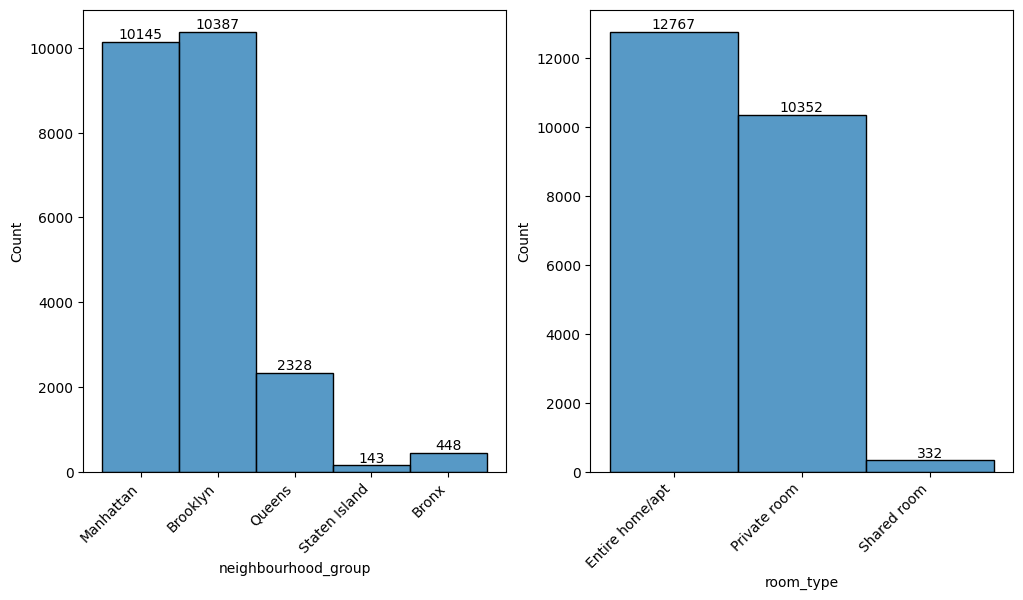

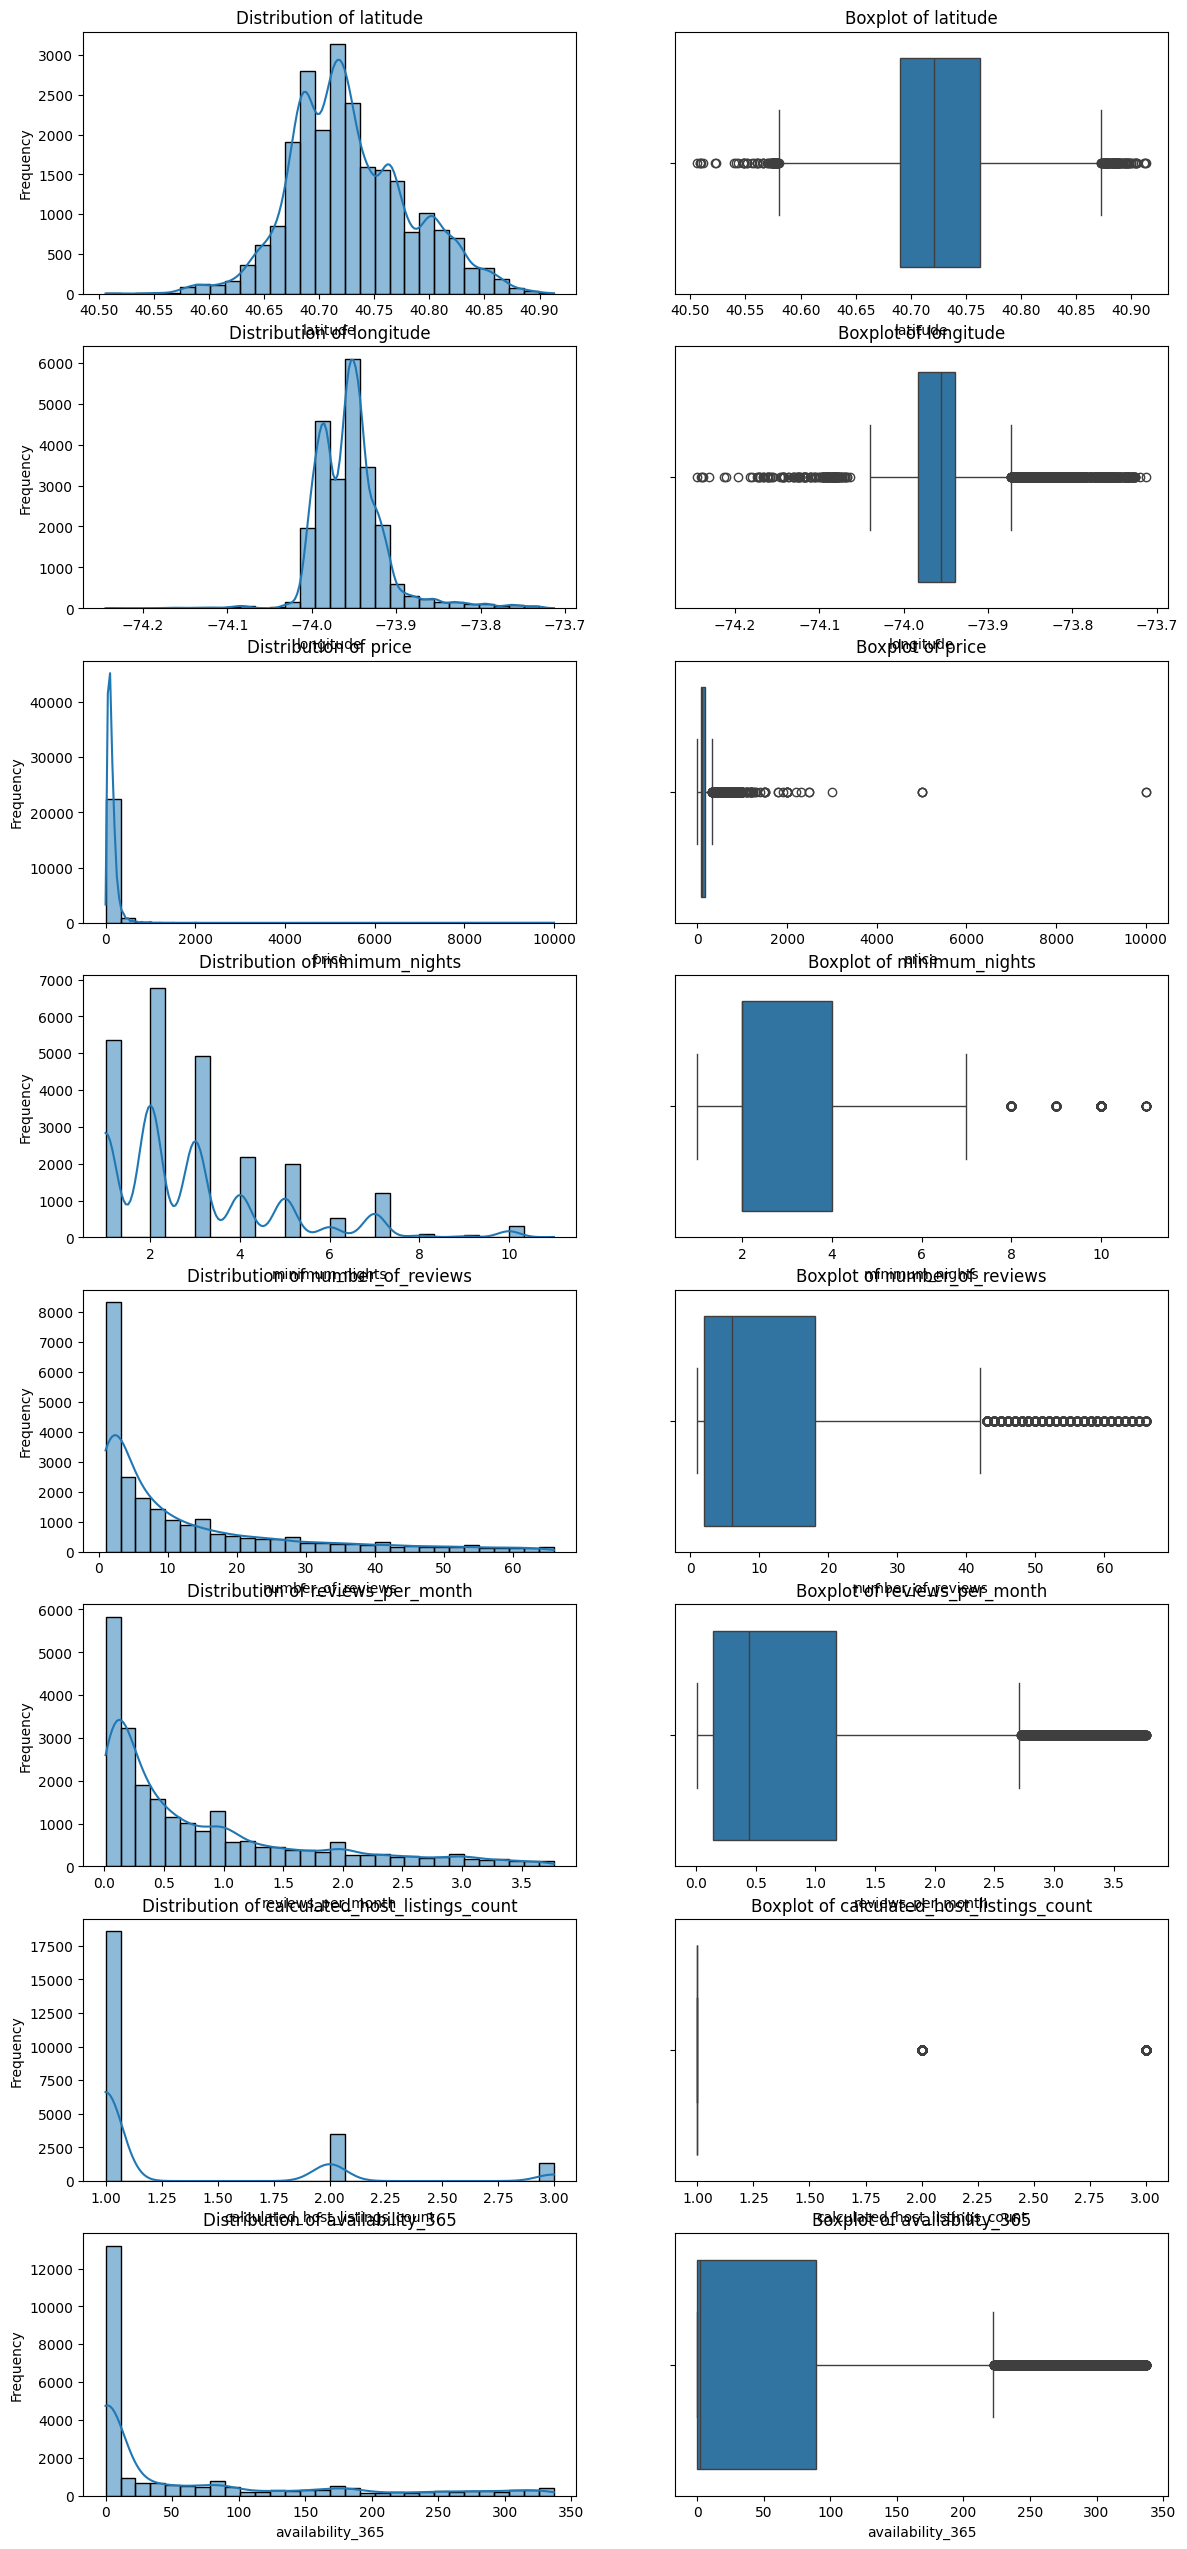

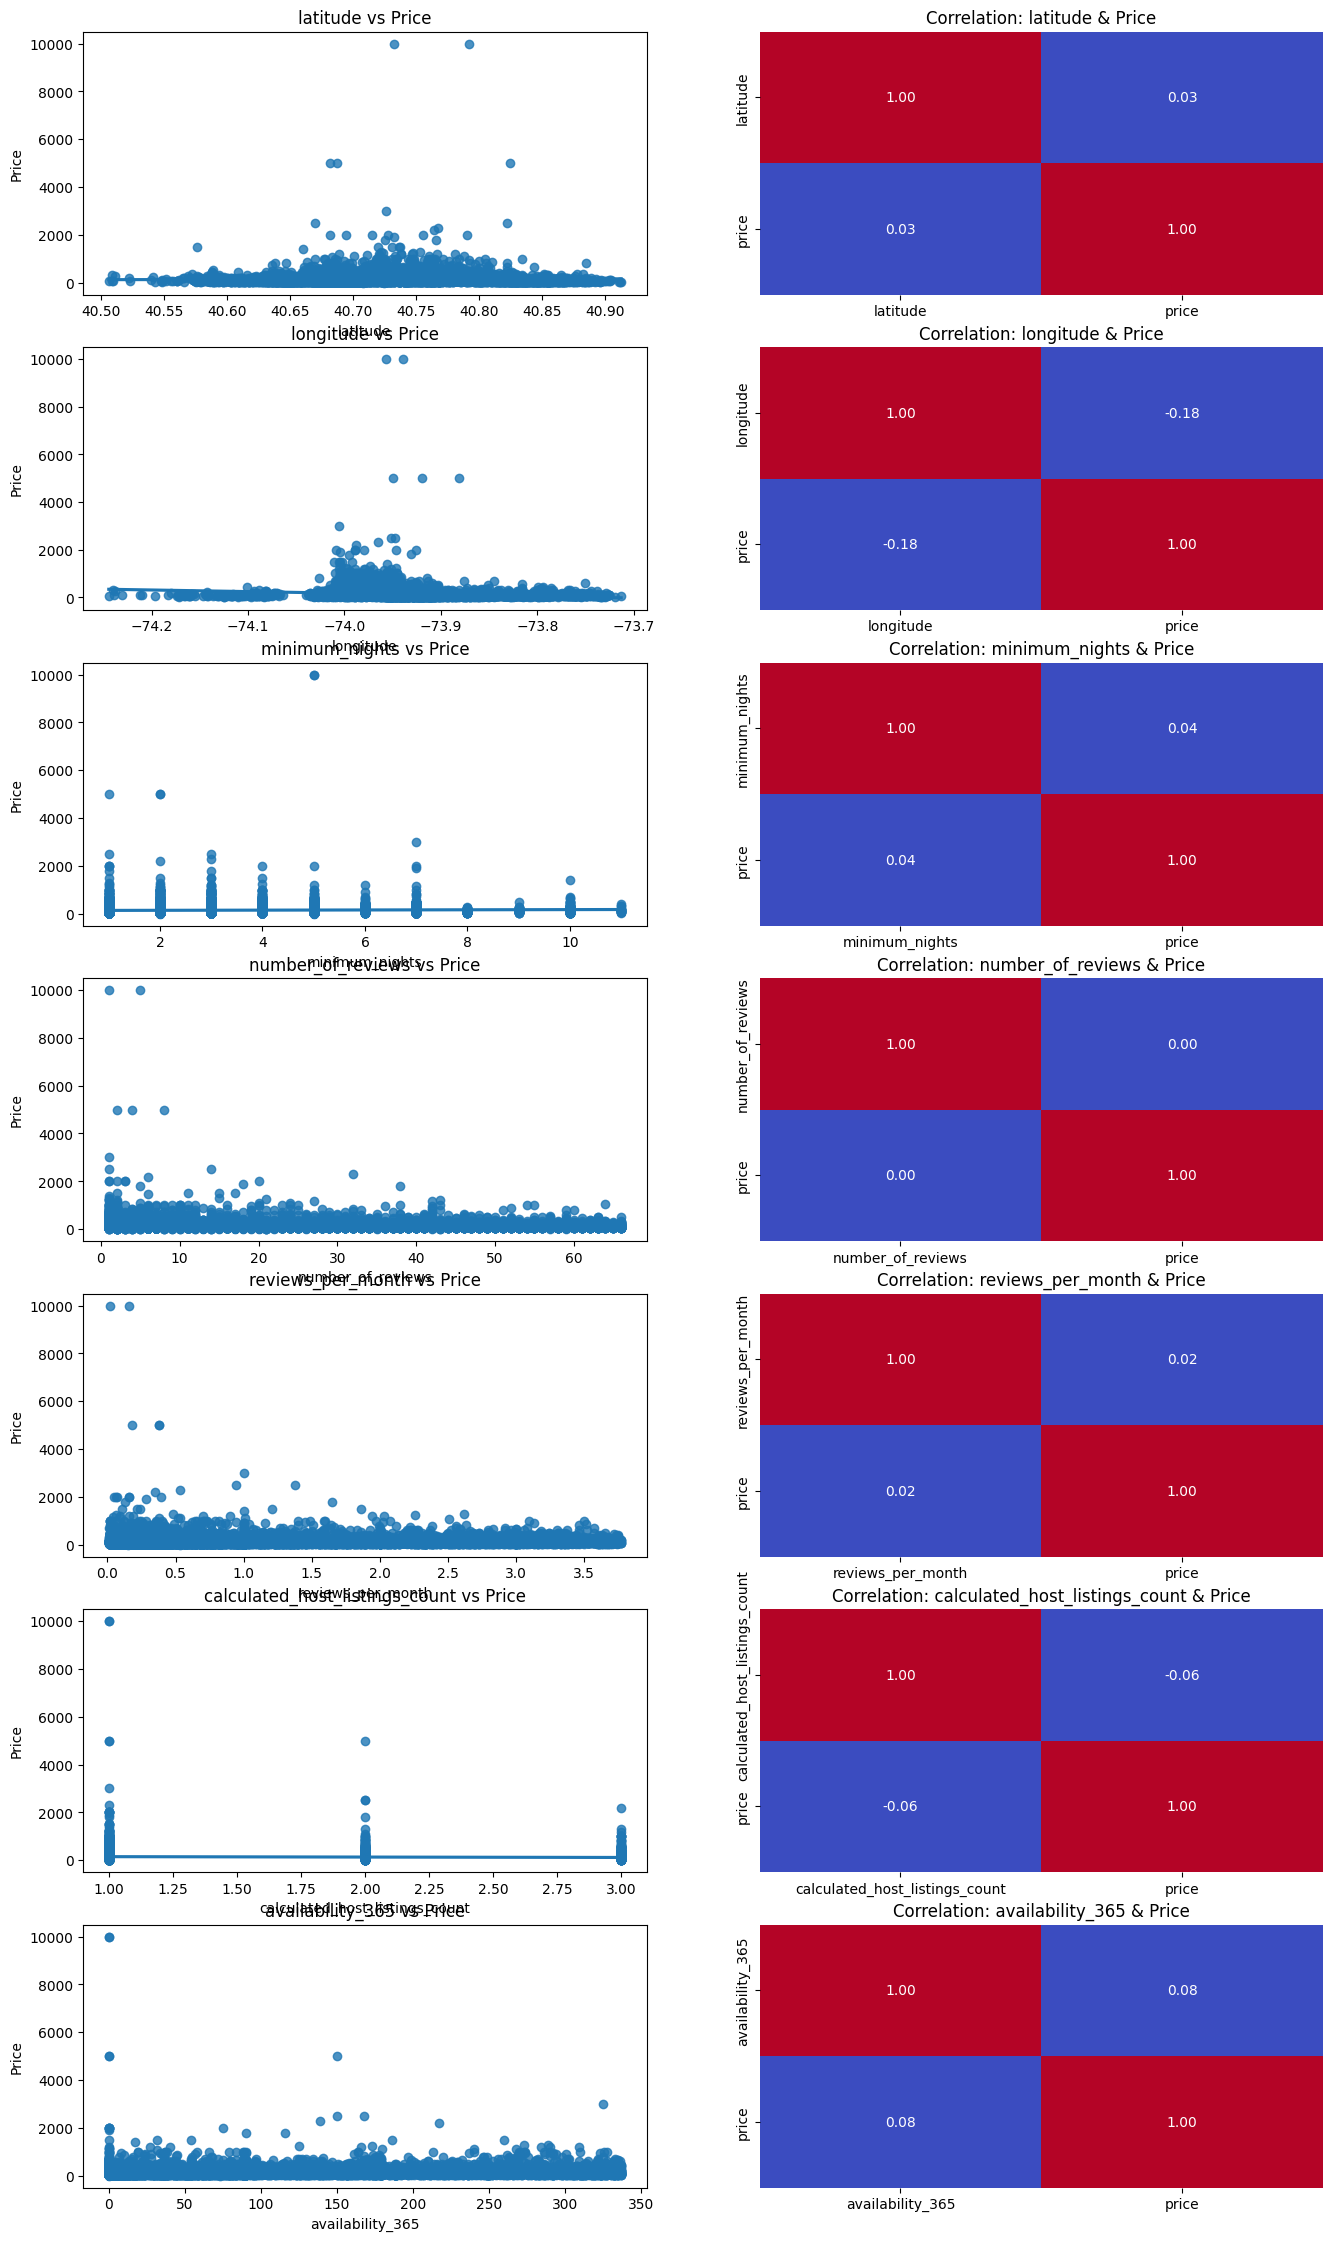

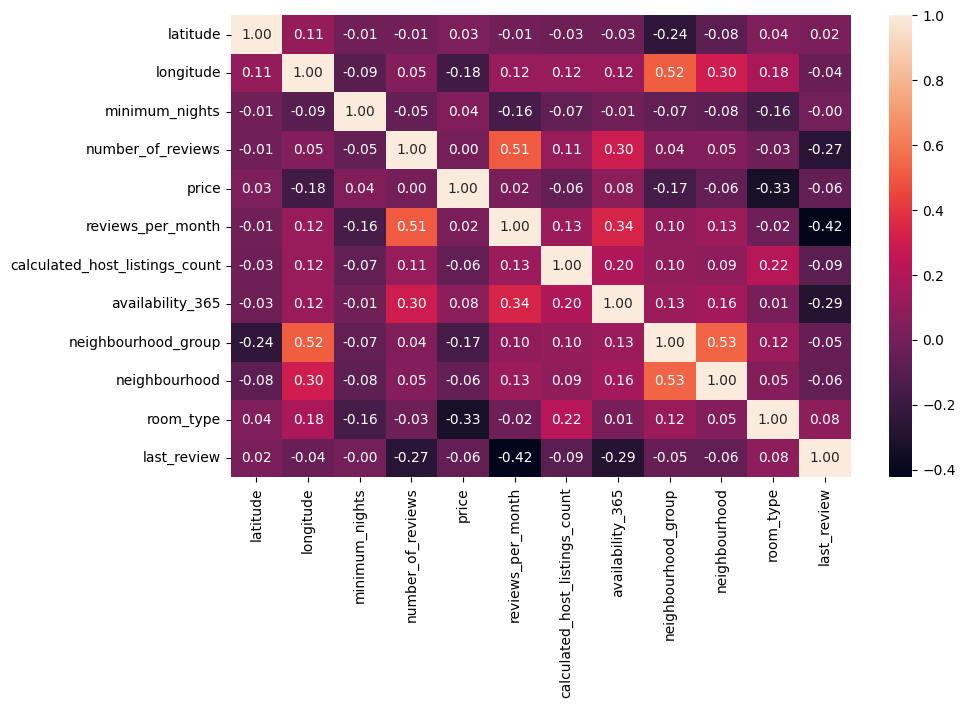

<Figure size 640x480 with 0 Axes>

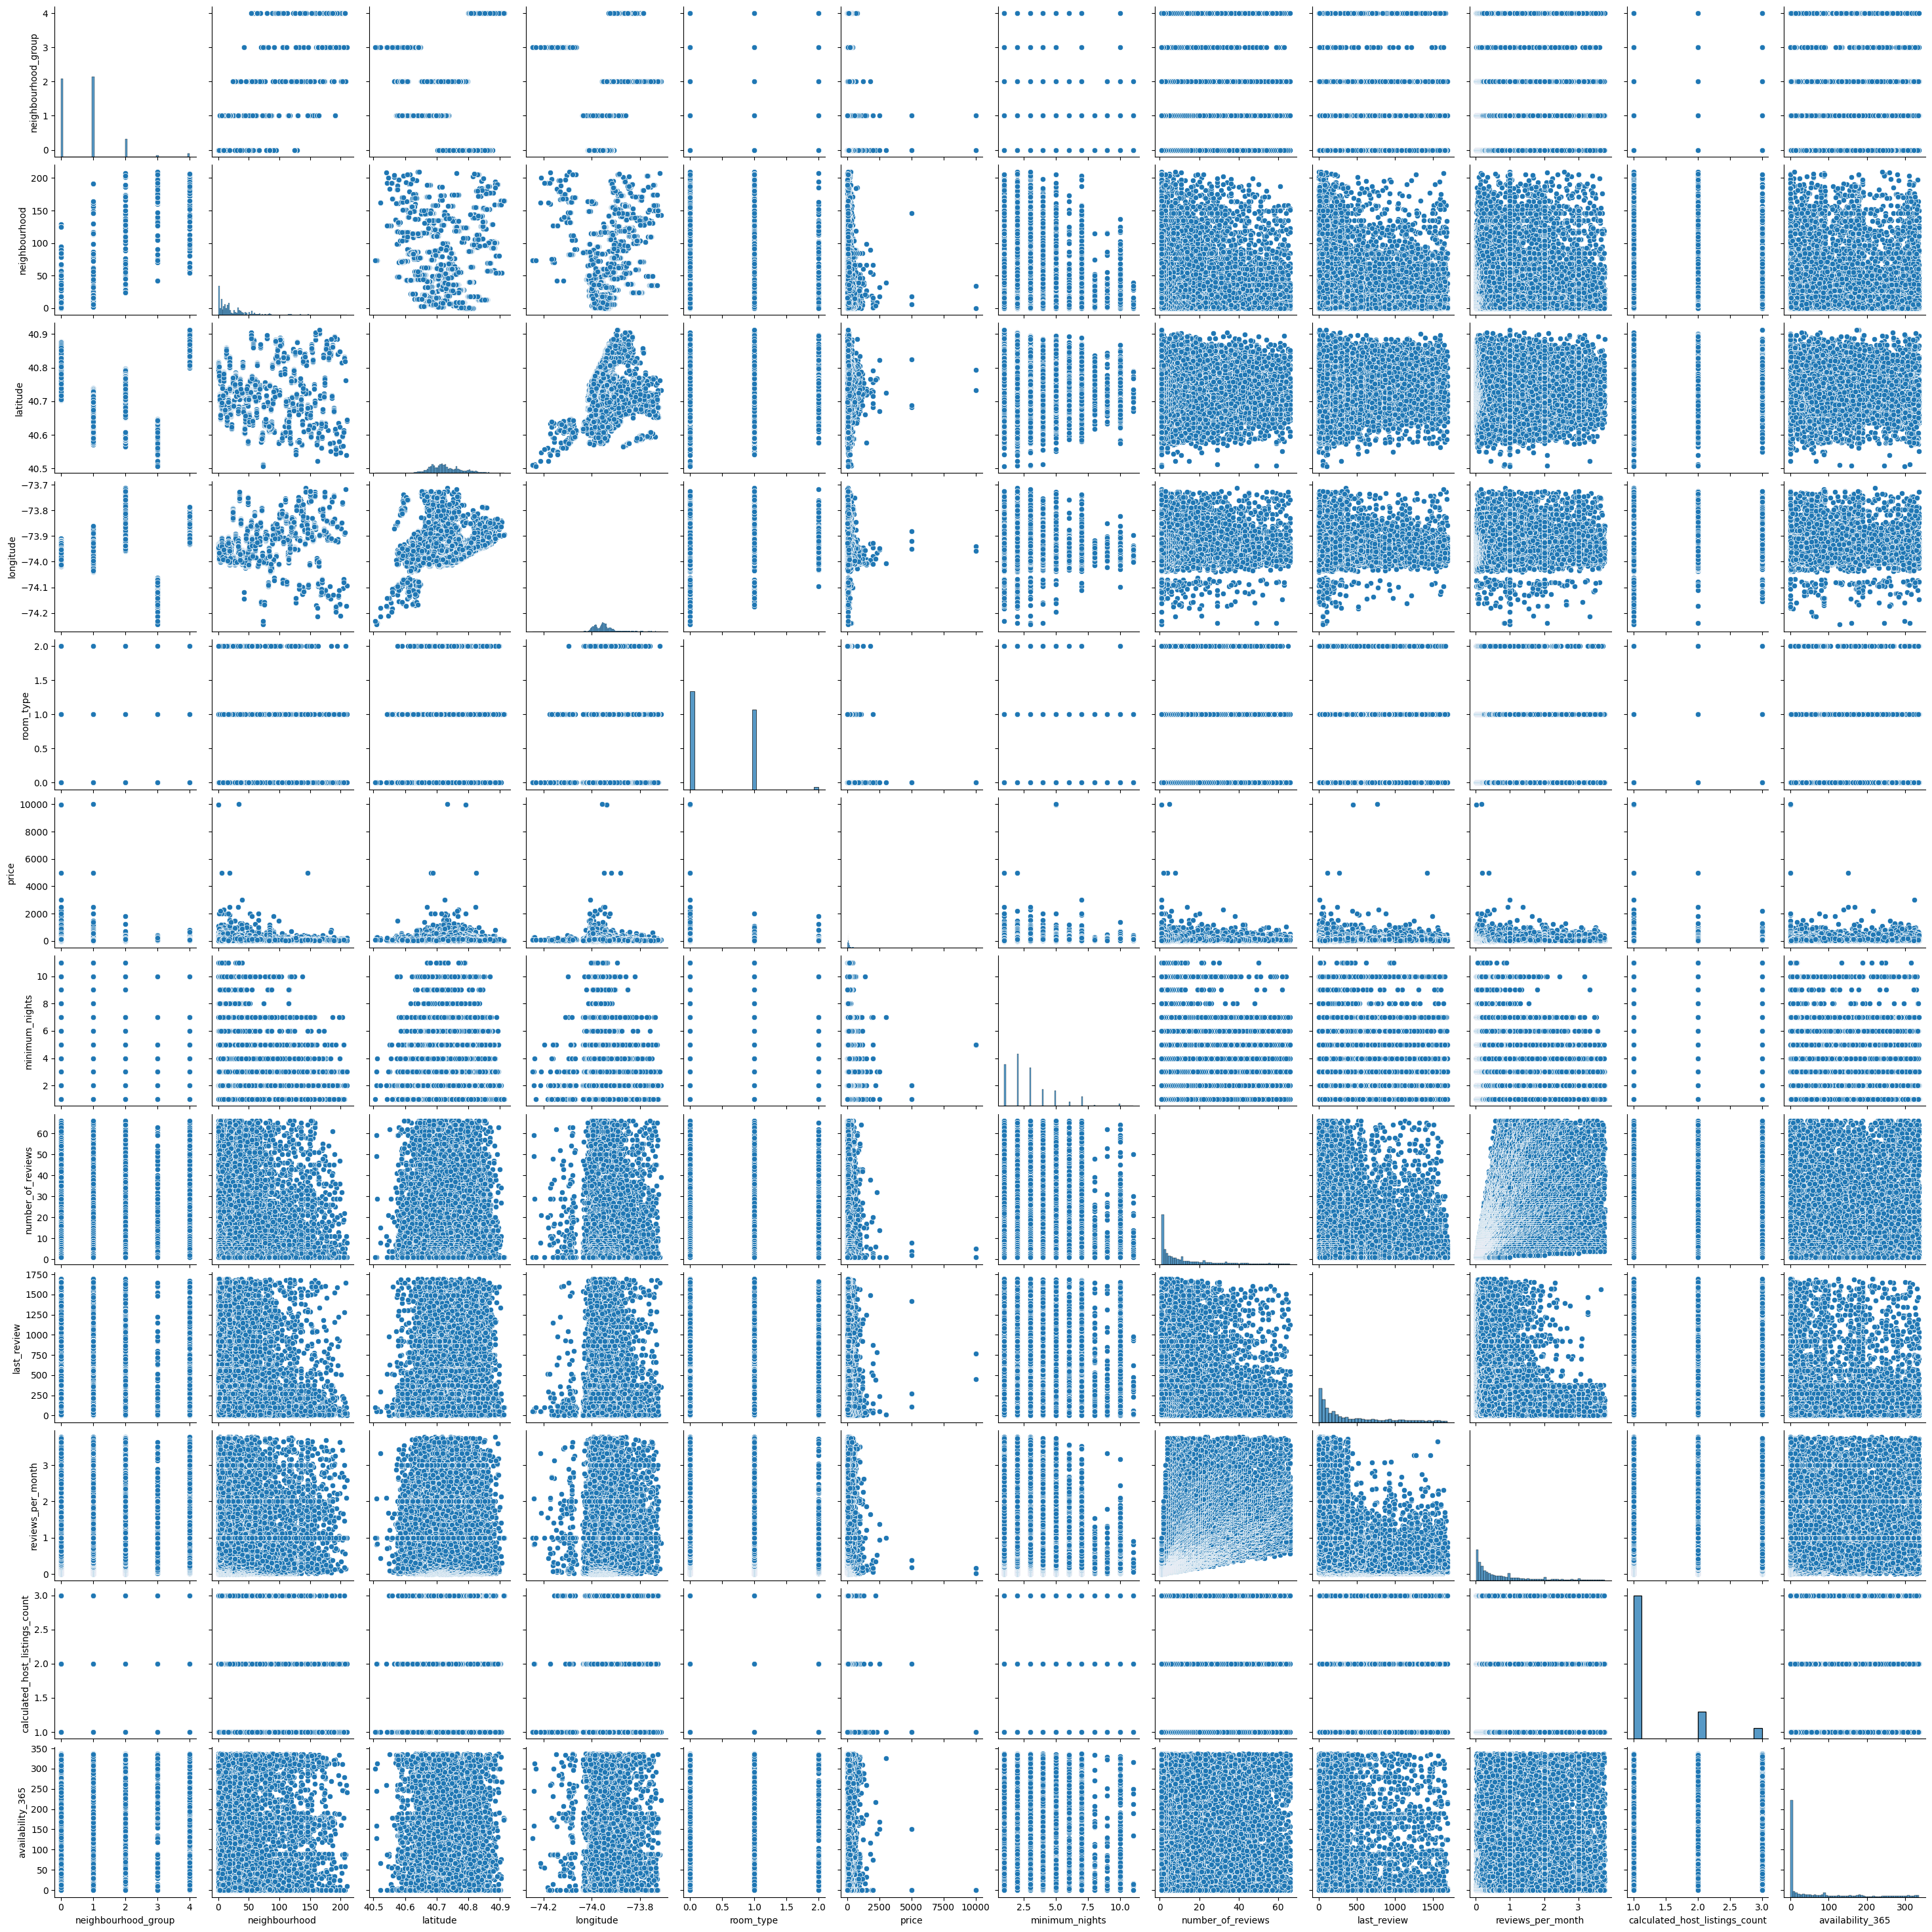

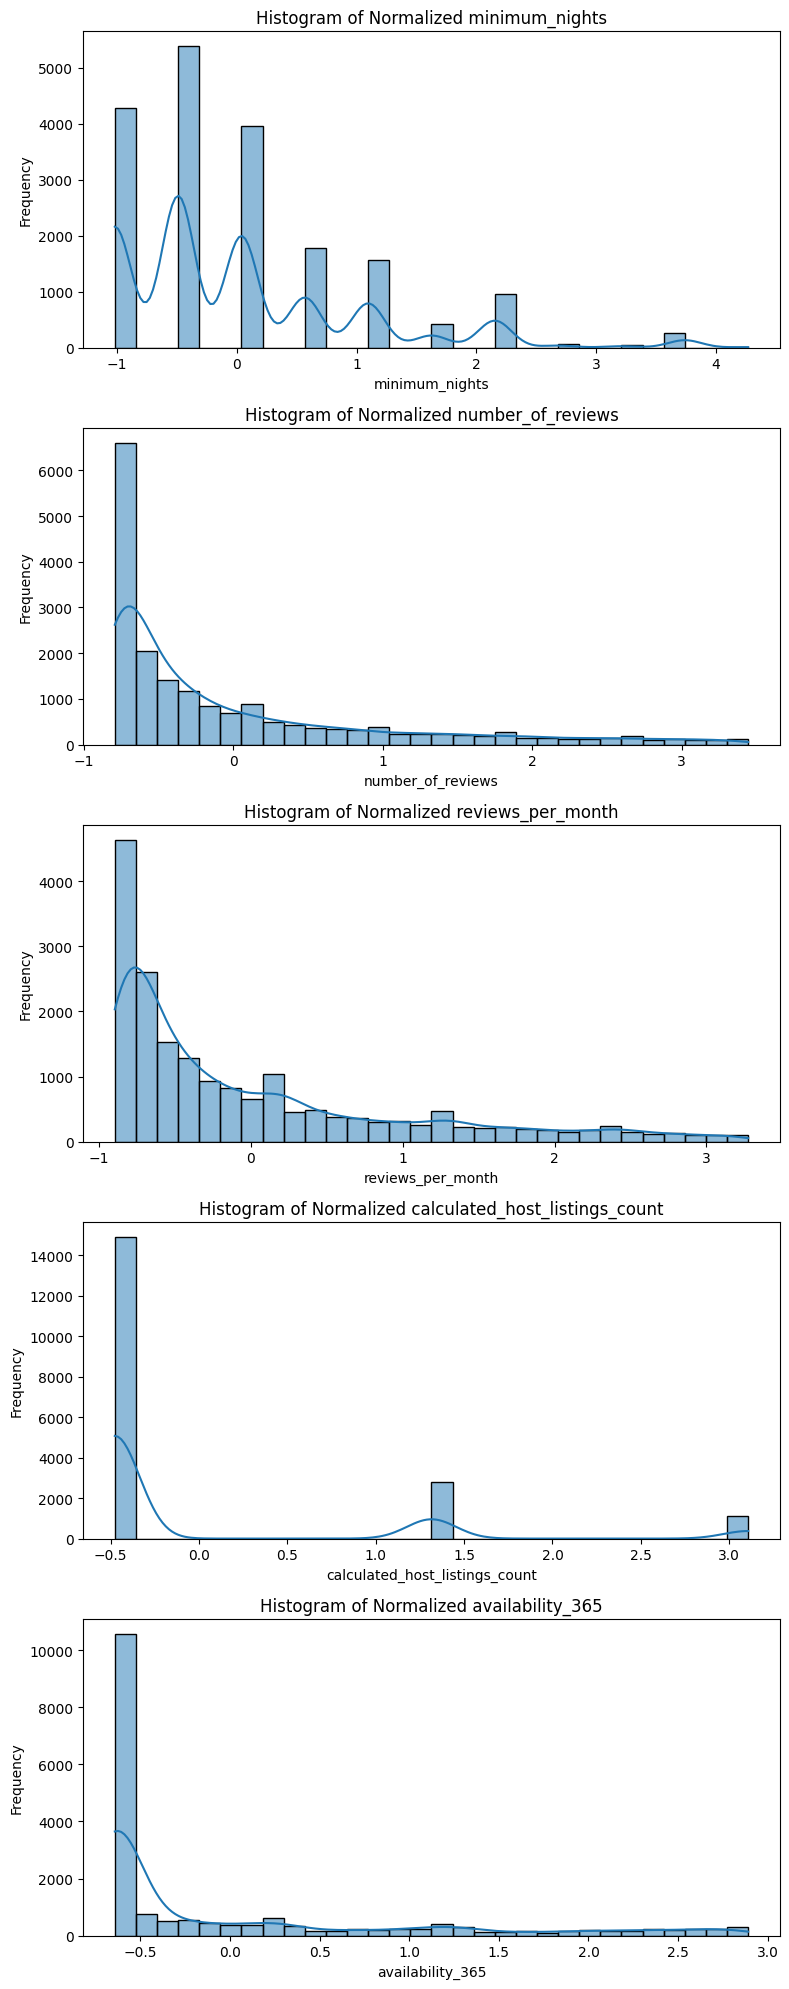

   minimum_nights  number_of_reviews  reviews_per_month  \
0             3.0               28.0               2.41   
1             3.0                7.0               0.41   
2             2.0                4.0               0.99   
3             3.0               31.0               0.57   
4             2.0                1.0               0.03   

   calculated_host_listings_count  availability_365  
0                             1.0              19.0  
1                             1.0               0.0  
2                             1.0               0.0  
3                             1.0               0.0  
4                             1.0               0.0  


In [1]:
# Your code here
from utils import db_connect
engine = db_connect()

# your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 #%%

pd.set_option('display.max_columns', None) 


nyc_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')

# INITIAL SCREENING
print(nyc_data.head())
print(nyc_data.shape)
print(nyc_data.info())
print(nyc_data.describe())

# PROBLEM STATEMENT
# To determine factors influencing and determining property price per night.

# HANDLE DUPLICATES
duplicates = nyc_data.drop('id', axis=1).duplicated().sum()
if duplicates != 0:
    nyc_data.drop_duplicates(subset=nyc_data.columns.difference(['id']))

# HANDLE NULL VALUES
nulls = (nyc_data.isnull().sum().sort_values(ascending=False) / len(nyc_data)).apply(lambda x:"%.4f" % x)
print(nulls)

# REMOVE IRRELEVANT DIMENSIONS
nyc_data.drop(['id', 'name', 'host_id', 'host_name'], axis=1, inplace=True)

# REMOVE OUTLIERS 
cols = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
for col in cols: 
    q1, q3 = nyc_data[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    
    nyc_data = nyc_data[(nyc_data[col] >= (q1 - 1.5 * iqr)) & (nyc_data[col] <= (q3 + 1.5 * iqr))]

print(nyc_data.info())

"""
# CUT COLUMNS IN BINS
for col in cols:
    nyc_data[f'binned_{col}'] = pd.cut(nyc_data[col], 10)
    nyc_data[f'binned_{col}'] = nyc_data[f'binned_{col}'].apply(lambda x: x.mid)

plt.figure(figsize=(12, 12))
for i, col in enumerate(cols, start=1):
    plt.subplot(3, 2, i)  # Define a 3x2 grid, with the plot at index i
    sns.countplot(data=nyc_data, x=f'binned_{col}')
    plt.title(f'Distribution of Binned {col}')
    plt.xticks(rotation=45)
"""

# UNIVARIATE DATA ANALYSIS

cat_dimensions = nyc_data[['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']]
num_dimensions = nyc_data[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

# Visualize categorical dimensions
fig, axis = plt.subplots(1,2, figsize=(12, 6))
hist1 = sns.histplot(ax=axis[0], data=cat_dimensions, x='neighbourhood_group')
for container in hist1.containers: 
    hist1.bar_label(container, fontsize=10)
hist2 = sns.histplot(ax=axis[1], data=cat_dimensions, x='room_type')
for container in hist2.containers: 
    hist2.bar_label(container, fontsize=10)


for ax in axis.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate 45 degrees and align right

# Ratio of main neighborhood groups
main_neighborhoods = nyc_data['neighbourhood_group'].value_counts(normalize=True).reset_index()
main_neighborhoods.columns = ['neighbourhood_group', 'proportion']
main_neighborhoods['proportion'] = main_neighborhoods['proportion'].apply(lambda x: f"{x:.4f}")
print(main_neighborhoods)

# Ratio of main room types
main_roomtypes = nyc_data['room_type'].value_counts(normalize=True).reset_index()
main_roomtypes.columns = ['room_type', 'proportion']
main_roomtypes['proportion'] = main_roomtypes['proportion'].apply(lambda x: f"{x:.4f}")
print(main_roomtypes)

# Visualize numerical values

fig, axes = plt.subplots(8, 2, figsize=(14, 32))

columns = num_dimensions.columns

for i, col in enumerate(columns):
    ax_hist = axes[i, 0]
    sns.histplot(num_dimensions[col], kde=True, ax=ax_hist, bins=30)
    ax_hist.set_title(f'Distribution of {col}')
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel('Frequency')
    ax_box = axes[i, 1]
    sns.boxplot(x=num_dimensions[col], ax=ax_box)
    ax_box.set_title(f'Boxplot of {col}')
    ax_box.set_xlabel(col)


# MULTIVARIATE ANALYSIS

# Numerical vs numerical values

features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
            'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
fig, axes = plt.subplots(len(features), 2, figsize=(16, 28))

for i, feature in enumerate(features):
    sns.regplot(ax=axes[i, 0], data=nyc_data, x=feature, y='price')
    axes[i, 0].set_title(f'{feature} vs Price')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Price')
    sns.heatmap(ax=axes[i, 1], 
                data=nyc_data[[feature, 'price']].corr(), 
                annot=True, fmt='.2f', cbar=False, cmap='coolwarm')
    axes[i, 1].set_title(f'Correlation: {feature} & Price')

# Numerical vs categorical values
cat_columns = ['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']
for col in cat_columns:
    nyc_data[col] = pd.factorize(nyc_data[col])[0]
    
fig, axis = plt.subplots(figsize = (10, 6))
sns.heatmap(nyc_data[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'price',
            'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']].corr(), annot = True, fmt = ".2f")

plt.figure()
sns.pairplot(data=nyc_data)


# NORMALIZE NUMERICAL VALUES
from sklearn.model_selection import train_test_split

X = nyc_data.drop('price', axis=1)[cols]
y = nyc_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=cols)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=cols)
print(X_train_norm)

fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(8, len(cols) * 4))

for i, col in enumerate(X_train_norm.columns):
    sns.histplot(X_train_norm[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Histogram of Normalized {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# FEATURE SELECTION
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k=5)
selection_model.fit(X_train_norm, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])
print(X_train_sel.head())